In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [10]:
df1 = pd.read_csv("daily-calorie-summary-101623.csv")
#df1 = pd.read_csv("daily-calorie-summary.csv")
df2 = pd.read_csv("food-logs-101623.csv")
df3 = pd.read_csv("exercise-logs.csv")
# 1 row of data here only df4 = pd.read_csv("apple-activity-exercise-goal.csv")

In [11]:
# Convert the date to datetime64
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
#df4['Date'] = pd.to_datetime(df3['Date'])

In [12]:
#clean the column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
#df4.columns = df4.columns.str.strip()

#underscore all columns otherwise DF Query doesn't work
df1.columns = [column.replace(" ", "_") for column in df1.columns]
df2.columns = [column.replace(" ", "_") for column in df2.columns]
df3.columns = [column.replace(" ", "_") for column in df3.columns]
#df4.columns = [column.replace(" ", "_") for column in df4.columns]

In [13]:
df3["Name"].unique()

array(['Steps Calorie Bonus', 'Elliptical', 'Running', 'Weight Lifting',
       'Freestyle', 'Lawn Mowing', 'Skateboarding', 'Stairmaster',
       'Elliptical Minute On Half Off. 20 Hard.',
       'HIIT (High Intensity Interval Training)',
       'Walking, Moderate Incline', 'Bicycling', '440 Ymca', 'Swimming',
       'HealthKit Workout', 'Calorie Burn Bonus', 'Kettlebells',
       'Core Fusion', 'Water Skiing'], dtype=object)

In [14]:
#df1 date 05/19 to 09/01 is low carb time
df1_2023 = df1.query("Date >= '05/19/2023' and Date <= '09/01/2023'")
#df1_2023 = df1.query("Date >= '01/01/2023'")
df2_2023 = df2.query("Date >= '01/01/2023'")
df3_2023 = df3.query("Date >= '01/01/2023'")

In [15]:
df_fasting_summer = df2_2023.query("Name == 'Intermittent Fasting' and Date >= '2023-06-01'")
df_fasting_summer.shape

(47, 16)

In [16]:
df1_2023_no_zero = df1_2023.query("Food_cals > 0.0")

In [17]:
print("total days so far this year - ", df1_2023.shape)
print(" ")
print("total days actually tracked this year - ", df1_2023_no_zero.shape)

total days so far this year -  (106, 5)
 
total days actually tracked this year -  (104, 5)


In [18]:
print(df1_2023_no_zero.mean())

Food_cals        1713.567308
Exercise_cals     313.201923
Budget_cals      1602.642885
EER              2602.642885
dtype: float64


/var/folders/mk/d0nn97qx7hgd3l98y8jcxbj80000gn/T/ipykernel_33669/103257515.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df1_2023_no_zero.mean())


In [19]:
df_blew_it = df1_2023_no_zero.query("Food_cals > 2000")
df_blew_it

,Date,Food_cals,Exercise_cals,Budget_cals,EER
1342,2023-05-20,3077.0,0.0,1621.56,2621.56
1346,2023-05-24,3073.0,284.0,1621.56,2621.56
1355,2023-06-02,2155.0,716.0,1621.56,2621.56
1357,2023-06-04,3523.0,606.0,1621.56,2621.56
1368,2023-06-15,2242.0,293.0,1595.94,2595.94
1377,2023-06-24,2274.0,0.0,1595.94,2595.94
1383,2023-06-30,2026.0,539.0,1595.94,2595.94
1384,2023-07-01,2076.0,384.0,1595.94,2595.94
1385,2023-07-02,2556.0,121.0,1595.94,2595.94
1390,2023-07-07,2304.0,583.0,1595.94,2595.94


In [20]:
df_blew_it.std()

Date             29 days 02:54:24.299911733
Food_cals                        579.272541
Exercise_cals                    234.364908
Budget_cals                       11.490978
EER                               11.490978
dtype: object

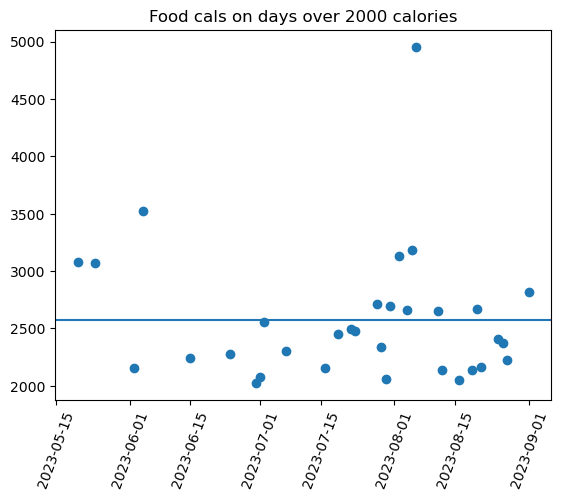

In [38]:
#plt.ylim(-40,40) # Setting y limits so the axis are consistent
plt.title("Food cals on days over 2000 calories") # Setting the title 
plt.scatter(x=df_blew_it["Date"], y=df_blew_it['Food_cals']); # Plotting the scatter
plt.xticks(rotation=70)
plt.axhline(y=np.nanmean(df_blew_it.Food_cals)) #mean line
plt.show(); # Telling matplotlib to show the chart

In [27]:
print("Estimated Energy Requirement (EER), which is your basal metabolic rate (BMR) multiplied by your chosen physical activity level (PAL). Your BMR is the number of calories your body burns at rest and is the minimum daily calorie burn required to keep your body functioning")

Estimated Energy Requirement (EER), which is your basal metabolic rate (BMR) multiplied by your chosen physical activity level (PAL). Your BMR is the number of calories your body burns at rest and is the minimum daily calorie burn required to keep your body functioning


In [26]:
print ("data frame with no missed days, amount of days is", df1_2023_no_zero.shape)
print ("data frame with no missed days, amount of days I WENT OVER 2000 cals is", df_blew_it.shape)
print ("So I went over 2000 calories", 32/104, "days")
print("The average counts on days over 2k cals is:")
print(df_blew_it.mean())

data frame with no missed days, amount of days is (104, 5)
data frame with no missed days, amount of days I WENT OVER 2000 cals is (32, 5)
So I went over 2000 calories 0.3076923076923077 days
The average counts on days over 2k cals is:
Food_cals        2571.03125
Exercise_cals     300.15625
Budget_cals      1601.46375
EER              2601.46375
dtype: float64


/var/folders/mk/d0nn97qx7hgd3l98y8jcxbj80000gn/T/ipykernel_38923/3232004128.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df_blew_it.mean())


<AxesSubplot:xlabel='Date'>

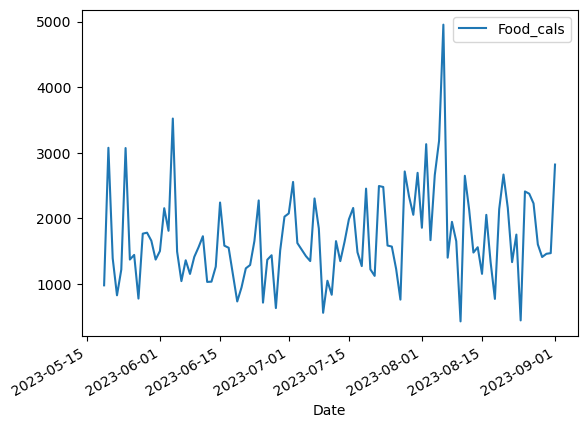

In [59]:
df1_2023_no_zero.plot("Date", "Food_cals")

In [51]:
#all the data even days not tracked. Excercise calories are lower average
df1_2023.mean()

/var/folders/mk/d0nn97qx7hgd3l98y8jcxbj80000gn/T/ipykernel_57232/3406305063.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1_2023.mean()


Food_cals        1681.235849
Exercise_cals     313.396226
Budget_cals      1602.516415
EER              2602.516415
dtype: float64

In [12]:
freq = df2_2023["Icon"].value_counts()
print("Printing the frequency")
display(freq)
  
# printing the most frequent element
print("Printing the most frequent element of series")
display(df2_2023["Icon"].mode());

Printing the frequency


Chicken         102
Almond          100
Cheese           88
PeanutButter     72
Egg              64
               ... 
Mushroom          1
Coleslaw          1
Peas              1
Cherry            1
WineRed           1
Name: Icon, Length: 164, dtype: int64

Printing the most frequent element of series


0    Chicken
Name: Icon, dtype: object

In [26]:
df2_2023.columns

Index(['Date', 'Name', 'Icon', 'Meal', 'Quantity', 'Units', 'Calories',
       'Deleted', 'Fat_(g)', 'Protein_(g)', 'Carbohydrates_(g)',
       'Saturated_Fat_(g)', 'Sugars_(g)', 'Fiber_(g)', 'Cholesterol_(mg)',
       'Sodium_(mg)'],
      dtype='object')

In [27]:
df2_2023["Calories"].max()

'990'

In [28]:
highest_cal = df2_2023.query("Calories == Calories.max()")

highest_cal

,Date,Name,Icon,Meal,Quantity,Units,Calories,Deleted,Fat_(g),Protein_(g),Carbohydrates_(g),Saturated_Fat_(g),Sugars_(g),Fiber_(g),Cholesterol_(mg),Sodium_(mg)
4204,2023-06-30,Baked chicken wings w/skin,ChickenWing,Dinner,10.0,Pieces,990,0,70.0,90.0,0.0,20.0,0.0,0.0,290.0,280.0


In [15]:
freq = df2_2023["Name"].value_counts()
print("Printing the frequency")
display(freq)
  
# printing the most frequent element
print("Printing the most frequent element of series")
display(df2_2023["Name"].mode());

Printing the frequency


Peanut Butter, Creamy                                72
Almonds Raw                                          52
Cheese, Cheddar, Shredded                            47
Scrambled Eggs                                       45
Avocado                                              41
                                                     ..
Lunch Pack Teriyaki Beef Jerky                        1
Broccoli, Roasted w/ Oil                              1
Fish, Tuna, White, Can, Albacore, In Water, Solid     1
Cookie, Coconut Macaroon                              1
Cookie, Chocolate Chunk                               1
Name: Name, Length: 633, dtype: int64

Printing the most frequent element of series


0    Peanut Butter, Creamy
Name: Name, dtype: object

In [16]:
almond_checka = df2_2023.query("Icon == 'Almond' and Quantity >0")

In [17]:
almond_checka["Quantity"].mode()

0    30.0
Name: Quantity, dtype: float64

In [18]:
df2_2023.max()

Date                 2023-08-21 00:00:00
Name                       village juice
Icon                            Zucchini
Meal                              Snacks
Quantity                           332.5
Units                          Teaspoons
Calories                             990
Deleted                                1
Fat_(g)                           123.75
Protein_(g)                       147.13
Carbohydrates_(g)                 342.38
Saturated_Fat_(g)                  56.38
Sugars_(g)                         140.0
Fiber_(g)                           56.0
Cholesterol_(mg)                   704.0
Sodium_(mg)                       5967.5
dtype: object

In [24]:
fast_checka = df2_2023.query("Name == 'Intermittent Fasting'")
fast_checka.shape

(56, 16)

In [25]:
fast_checka

,Date,Name,Icon,Meal,Quantity,Units,Calories,Deleted,Fat_(g),Protein_(g),Carbohydrates_(g),Saturated_Fat_(g),Sugars_(g),Fiber_(g),Cholesterol_(mg),Sodium_(mg)
3563,2023-04-03,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3569,2023-04-04,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3590,2023-04-06,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3602,2023-04-07,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3671,2023-04-17,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3682,2023-04-18,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3750,2023-04-29,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3765,2023-05-09,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3772,2023-05-10,Intermittent Fasting,Default,Breakfast,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,2023-06-06,Intermittent Fasting,Default,Lunch,1.0,Serving,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#looks like I didn't get in a good habit til february
df2_2023.query("Date > '6/1/2023' and Date < '6/30/2023'")

,Date,Name,Icon,Meal,Quantity,Units,Calories,Deleted,Fat_(g),Protein_(g),Carbohydrates_(g),Saturated_Fat_(g),Sugars_(g),Fiber_(g),Cholesterol_(mg),Sodium_(mg)
3963,2023-06-02,"Pork Chop, Center Loin, Cooked",PorkChop,Breakfast,6.00,Ounces,356,0,18.81,43.56,0.00,5.97,0.00,0.00,142.88,93.55
3964,2023-06-02,"Eggs, Med, Fried",Egg,Breakfast,2.00,Each,156,0,12.00,11.00,1.00,4.00,NaN,NaN,NaN,414.00
3965,2023-06-02,Chicken Legs Baked,Chicken,Lunch,2.00,Each,448,0,24.00,56.00,0.00,6.00,0.00,0.00,188.00,188.00
3966,2023-06-02,Almonds Raw,Almond,Lunch,30.00,Each,200,0,17.50,7.50,7.50,1.25,1.25,3.75,0.00,0.00
3967,2023-06-02,"Green Beans, Cooked",SnapBean,Lunch,2.00,Cups,88,0,0.70,4.72,19.70,0.16,9.70,8.00,0.00,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,2023-06-29,"Beans - Black Beans, Reduced Sodium",BeanBlack,Lunch,0.75,Cup,180,0,0.75,10.50,34.50,0.00,1.50,9.00,0.00,360.00
4190,2023-06-29,Avocado,Avocado,Lunch,0.50,Each,161,0,14.73,2.10,8.57,2.13,0.66,6.73,0.00,7.40
4191,2023-06-29,Viva Roasted Rocoto Pepper Sauce Hot,Sauce,Lunch,1.00,Serving,250,0,28.00,0.00,2.00,2.00,1.00,0.00,5.00,120.00
4192,2023-06-29,"Sausage, Polska Kielbasa, Turkey",Sausage,Dinner,6.00,Ounces,273,0,15.19,24.30,6.70,6.70,6.70,0.00,106.31,1883.22


In [22]:
df3_2023

,Date,Name,Icon,Type,Quantity,Units,Calories,Deleted
1424,2023-02-05,HealthKit Workout,HealthkitExercise,Exercise,44,minutes,-0.0,4
1425,2023-02-09,HealthKit Workout,HealthkitExercise,Exercise,8,minutes,-0.0,4
1426,2023-02-10,Calorie Burn Bonus,Default,Exercise,0,minutes,-0.0,0
1427,2023-02-04,Calorie Burn Bonus,Default,Exercise,0,minutes,-0.0,0
1428,2023-02-05,Calorie Burn Bonus,Default,Exercise,0,minutes,-354.0,0
...,...,...,...,...,...,...,...,...
2001,2023-08-20,HealthKit Workout,HealthkitExercise,Exercise,22,minutes,-0.0,4
2002,2023-08-21,Calorie Burn Bonus,Default,Exercise,0,minutes,-352.0,0
2003,2023-08-21,HealthKit Workout,HealthkitExercise,Exercise,9,minutes,-0.0,4
2004,2023-08-21,HealthKit Workout,HealthkitExercise,Exercise,49,minutes,-0.0,4


In [23]:
df3_2023["Name"].mode()

0    HealthKit Workout
Name: Name, dtype: object

In [24]:
df3_2023.Calories.value_counts()

-0.000      413
-306.000      3
-76.000       3
-848.000      2
-354.000      2
           ... 
-222.123      1
-454.000      1
-253.000      1
-346.000      1
-352.000      1
Name: Calories, Length: 152, dtype: int64

In [25]:
df3_2023_no_zero = df3_2023.query("Calories < 0.0 and Quantity > 0")

In [26]:
df3_2023_no_zero.mean()

/var/folders/mk/d0nn97qx7hgd3l98y8jcxbj80000gn/T/ipykernel_29570/2621528902.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df3_2023_no_zero.mean()
/var/folders/mk/d0nn97qx7hgd3l98y8jcxbj80000gn/T/ipykernel_29570/2621528902.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3_2023_no_zero.mean()


Quantity     27.666667
Calories   -157.218333
Deleted       0.000000
dtype: float64

In [27]:
df3_2023_goodworkout = df3_2023.query("Calories <= -200")

In [28]:
pd.merge(df3_2023, df1_2023)

,Date,Name,Icon,Type,Quantity,Units,Calories,Deleted,Food_cals,Exercise_cals,Budget_cals,EER
0,2023-02-05,HealthKit Workout,HealthkitExercise,Exercise,44,minutes,-0.0,4,2565.0,354.0,1601.85,2608.99
1,2023-02-05,Calorie Burn Bonus,Default,Exercise,0,minutes,-354.0,0,2565.0,354.0,1601.85,2608.99
2,2023-02-09,HealthKit Workout,HealthkitExercise,Exercise,8,minutes,-0.0,4,1830.0,107.0,1601.85,2601.85
3,2023-02-09,Calorie Burn Bonus,Default,Exercise,0,minutes,-107.0,0,1830.0,107.0,1601.85,2601.85
4,2023-02-10,Calorie Burn Bonus,Default,Exercise,0,minutes,-0.0,0,987.0,0.0,1601.85,2601.85
...,...,...,...,...,...,...,...,...,...,...,...,...
577,2023-08-20,HealthKit Workout,HealthkitExercise,Exercise,22,minutes,-0.0,4,2669.0,670.0,1614.34,2614.34
578,2023-08-21,Calorie Burn Bonus,Default,Exercise,0,minutes,-352.0,0,2162.0,352.0,1614.34,2614.34
579,2023-08-21,HealthKit Workout,HealthkitExercise,Exercise,9,minutes,-0.0,4,2162.0,352.0,1614.34,2614.34
580,2023-08-21,HealthKit Workout,HealthkitExercise,Exercise,49,minutes,-0.0,4,2162.0,352.0,1614.34,2614.34
